# Github repo link
# https://github.com/yizhenxu0310/HW1_AML_YizhenXu

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocess via Excel to include column 'region'


In [0]:
df= pd.read_csv('worldhappiness2019_new.csv')
df

,Happiness_level,Country or region,region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Very High,Finland,Europe,1.340,1.587,0.986,0.596,0.153,0.393
1,Very High,Denmark,Europe,1.383,1.573,0.996,0.592,0.252,0.410
2,Very High,Norway,Europe,1.488,1.582,1.028,0.603,0.271,0.341
3,Very High,Iceland,Europe,1.380,1.624,1.026,0.591,0.354,0.118
4,Very High,Netherlands,Europe,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,Very Low,Rwanda,Africa,0.359,0.711,0.614,0.555,0.217,0.411
152,Very Low,Tanzania,Asia,0.476,0.885,0.499,0.417,0.276,0.147
153,Very Low,Afghanistan,Asia,0.350,0.517,0.361,0.000,0.158,0.025
154,Very Low,Central African Republic,Africa,0.026,0.000,0.105,0.225,0.235,0.035


# Explore bivariate results

### The relationship between Happiness_level and GDP per capita is that the higher GDP per capita, the higher happiness level.

### The relationship between Happiness_level and Social support is that the higher social support, the higher happiness level.

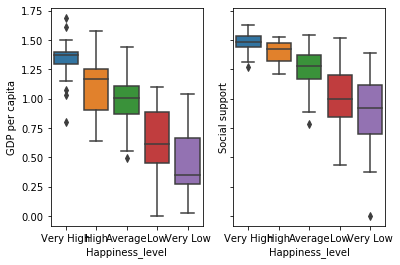

In [0]:
fig,axes=plt.subplots(1,2,sharey=True)
sns.boxplot(x="Happiness_level",y="GDP per capita",data=df,ax=axes[0])
sns.boxplot(x="Happiness_level",y="Social support",data=df,ax=axes[1])

### The relationship between Happiness_level and Freedom to make life choices is that the higher level of freedom, the higher happiness level.
### The relationship between Happiness_level and Healthy life expectancy is that the longer healthy life expectancy, the higher happiness level.

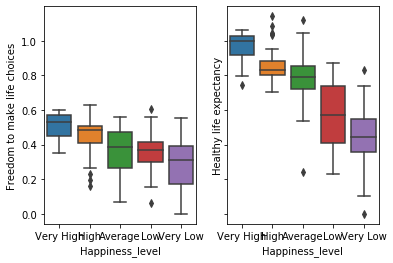

In [0]:
fig,axes=plt.subplots(1,2,sharey=True)
sns.boxplot(x="Happiness_level",y="Freedom to make life choices",data=df,ax=axes[0])
sns.boxplot(x="Happiness_level",y="Healthy life expectancy",data=df,ax=axes[1])

### The relationship between Happiness_level and Generosity is that when happiness level is very high, the generosiy level is the highest. However, when happiness level is high, the generosity level is the lowest. However, when the happiness level goes from hihg to very low, the generosity level decreases. 
### The relationship between Happiness_level and Perceptions of corruption is that when the happiness level is very high, the perception of corruption is highest. And when the happiness level is average, the perception of corruption is lowest.

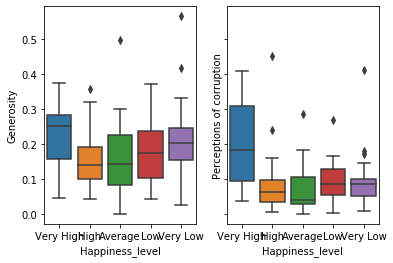

In [0]:
fig,axes=plt.subplots(1,2,sharey=True)
sns.boxplot(x="Happiness_level",y="Generosity",data=df,ax=axes[0])
sns.boxplot(x="Happiness_level",y="Perceptions of corruption",data=df,ax=axes[1])

### The relationship between Happiness_level and region is that Europe has the most above average happiness level, Asia and Americas has the same, and Africa has the least.


In [0]:
df1=df[(df['Happiness_level']=='Very High')]
df2=df[(df['Happiness_level']=='High')]
#to choose those whose hapiness level is above average, including very high and high
dfnew=df1.append(df2)   
dfnew.head()


,Happiness_level,Country or region,region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Very High,Finland,Europe,1.340,1.587,0.986,0.596,0.153,0.393
1,Very High,Denmark,Europe,1.383,1.573,0.996,0.592,0.252,0.410
2,Very High,Norway,Europe,1.488,1.582,1.028,0.603,0.271,0.341
3,Very High,Iceland,Europe,1.380,1.624,1.026,0.591,0.354,0.118
4,Very High,Netherlands,Europe,1.396,1.522,0.999,0.557,0.322,0.298


In [0]:
# to count the number of each region
dfnew['region'].value_counts()

Europe      25
Asia        17
Americas    17
Oceania      3
Africa       1
Name: region, dtype: int64

# feature selection


In [154]:
# convert 'region' type
from sklearn import preprocessing
def convert(data):
    number=preprocessing.LabelEncoder()
    data['region']=number.fit_transform(data['region'])
    return data

convert(df)

,Happiness_level,Country or region,region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Very High,Finland,3,1.340,1.587,0.986,0.596,0.153,0.393
1,Very High,Denmark,3,1.383,1.573,0.996,0.592,0.252,0.410
2,Very High,Norway,3,1.488,1.582,1.028,0.603,0.271,0.341
3,Very High,Iceland,3,1.380,1.624,1.026,0.591,0.354,0.118
4,Very High,Netherlands,3,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,Very Low,Rwanda,0,0.359,0.711,0.614,0.555,0.217,0.411
152,Very Low,Tanzania,2,0.476,0.885,0.499,0.417,0.276,0.147
153,Very Low,Afghanistan,2,0.350,0.517,0.361,0.000,0.158,0.025
154,Very Low,Central African Republic,0,0.026,0.000,0.105,0.225,0.235,0.035


In [0]:
y=df['Happiness_level']
X=df.drop(['Happiness_level'],axis=1)
X=X.drop(['Country or region'],axis=1)
X.head()

,region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,3,1.340,1.587,0.986,0.596,0.153,0.393
1,3,1.383,1.573,0.996,0.592,0.252,0.410
2,3,1.488,1.582,1.028,0.603,0.271,0.341
3,3,1.380,1.624,1.026,0.591,0.354,0.118
4,3,1.396,1.522,0.999,0.557,0.322,0.298


In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

                     Feature      Score
0                     region  37.512206
1             GDP per capita  17.212230
3    Healthy life expectancy   7.997161
2             Social support   6.465524
6  Perceptions of corruption   3.387830


I use SelectKBest to do feature selection and to choose 5 top variables among all 7 variables. From the result we can see that region is the most important variable related with happiness level. The second important variable is GPD per capital. And the following three variables are healthy life expectancy, social support and perceptions of corruption, sequentially. But there are no big differences among the latter three variables.


# Three prediction models 

In [0]:
data=pd.read_csv('worldhappiness2019_new.csv')
y=data['Happiness_level']
X=data.drop(['Happiness_level'],axis=1)
X=X.drop(['Country or region'],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [0]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features=X.columns.tolist()
numeric_features.remove('region')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
input_preprocessor=preprocessor.fit(X_train)

import pickle
pickle.dump(input_preprocessor, open( "preprocessor.pkl", "wb" ) )

In [156]:
# Check shape for keras input:
input_preprocessor.transform(X_train).shape

(117, 11)

In [157]:
pd.get_dummies(y_train).shape

(117, 5)

### Model 1 -- decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': np.arange(1,25,1)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=param_grid, cv=kfold)
grid.fit(input_preprocessor.transform(X_train), pd.get_dummies(y_train))

print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(input_preprocessor.transform(X_test), pd.get_dummies(y_test))))

best parameters: {'max_depth': 10}
test-set score: 0.436


### When using decision tree, the best parameter is max_depth of 10. ANd the prediction accuracy rate is 0.436.


### Model 2 -- KNN

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5,shuffle=True)    
skfold = StratifiedKFold(n_splits=5, shuffle=True)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=kfold)#set the cross validation methods to kfold for further use
model=grid.fit(input_preprocessor.transform(X_train), pd.get_dummies(y_train))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(input_preprocessor.transform(X_test), pd.get_dummies(y_test))))

best parameters: {'n_neighbors': 1}
test-set score: 0.564


### When using knn, the best parameter is n_neighbors of 1. ANd the prediction accuracy rate is 0.564.

### Model 3 -- Nueral Network

In [158]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(150,input_dim=11, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))   
                                            
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
model.fit(input_preprocessor.transform(X_train), pd.get_dummies(y_train), 
               batch_size = 60, 
               epochs = 500, validation_split=0) 

Epoch 1/500
117/117 [==============================] - 10s 87ms/step - loss: 1.5983 - acc: 0.2393
Epoch 2/500
117/117 [==============================] - 0s 124us/step - loss: 1.5909 - acc: 0.2735
Epoch 3/500
117/117 [==============================] - 0s 114us/step - loss: 1.5841 - acc: 0.2650
Epoch 4/500
117/117 [==============================] - 0s 82us/step - loss: 1.5767 - acc: 0.2735
Epoch 5/500
117/117 [==============================] - 0s 123us/step - loss: 1.5696 - acc: 0.2991
Epoch 6/500
117/117 [==============================] - 0s 122us/step - loss: 1.5627 - acc: 0.3077
Epoch 7/500
117/117 [==============================] - 0s 110us/step - loss: 1.5558 - acc: 0.3333
Epoch 8/500
117/117 [==============================] - 0s 126us/step - loss: 1.5491 - acc: 0.3419
Epoch 9/500
117/117 [==============================] - 0s 126us/step - loss: 1.5420 - acc: 0.3590
Epoch 10/500
117/117 [==============================] - 0s 98us/step - loss: 1.5351 - acc: 0.3590
Epoch 11/500
117/117 

In [159]:
# using predict_classes() for multi-class data to return predicted class index.

print(model.predict_classes(input_preprocessor.transform(X_test)))

prediction_index=model.predict_classes(input_preprocessor.transform(X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Function to use to return label from column index location
def index_to_label(labels,index_n): 
    return labels[index_n]
    
# Example: return label at predicted index location 1
index_to_label(labels,1)

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)
# Now we can extract some evaluative metrics to use for model submission

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata

model_eval_metrics( y_test,predicted_labels,classification="TRUE")

[4 1 1 4 0 2 2 3 1 1 4 0 4 0 3 4 3 1 2 4 2 2 0 3 2 4 2 1 4 0 4 1 3 1 1 4 0
 3 1]
['Very Low', 'High', 'High', 'Very Low', 'Average', 'Low', 'Low', 'Very High', 'High', 'High', 'Very Low', 'Average', 'Very Low', 'Average', 'Very High', 'Very Low', 'Very High', 'High', 'Low', 'Very Low', 'Low', 'Low', 'Average', 'Very High', 'Low', 'Very Low', 'Low', 'High', 'Very Low', 'Average', 'Very Low', 'High', 'Very High', 'High', 'High', 'Very Low', 'Average', 'Very High', 'High']


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.615385,0.620742,0.65619,0.643968,0,0,0,0


In [160]:
# add metrics to submittable object
modelevalobject=model_eval_metrics(y_test,predicted_labels,classification="TRUE")

modelevalobject


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.615385,0.620742,0.65619,0.643968,0,0,0,0


### The parameters are as follows: hidden layer is 3. Nuerons for first layer is 150. Nuerons for second layer is 100. Batch_size is 60. epochs is 500. validation_split is 0
### And the model's prediction accuracy rate is around 0.62, the f1_score is also around 0.62, the precision is 0.656 and the recall is 0.644.

# Submit best model (Model 3) to the leader board

In [0]:
# Load libraries for onnx model conversion (keras to onnx)
! pip3 install keras2onnx
! pip3 install onnxruntime

     |████████████████████████████████| 225kB 2.9MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 4.8MB 8.9MB/s 
  Created wheel for fire: filename=fire-0.2.1-py2.py3-none-any.whl size=103528 sha256=f058ea543e3b342726d37cafc216031b334fcf12c040e1efc6b7b8e709171f32
  Stored in directory: /root/.cache/pip/wheels/31/9c/c0/07b6dc7faf1844bb4688f46b569efe6cafaa2179c95db821da
Successfully built fire
     |████████████████████████████████| 3.6MB 2.9MB/s 


In [0]:
#Convert keras model object to onnx and then save it to .onnx file
import os

if not os.path.exists('mymodel.onnx'):
    from keras2onnx import convert_keras
    onx = convert_keras(model, 'mymodel.onnx')
    with open("mymodel.onnx", "wb") as f:
        f.write(onx.SerializeToString())

In [162]:
#install aimodelshare library
! pip3 install https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.2.tar.gz?raw=true

  Using cached https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.2.tar.gz?raw=true
  Created wheel for aimodelshare: filename=aimodelshare-0.0.2-cp36-none-any.whl size=5375 sha256=7033adbf8f460886cbfd617b1d6464dbed9d546f4ef47651d014a471f676d235
  Stored in directory: /root/.cache/pip/wheels/31/8d/ac/09cb6ef7374ec79e02843c347195e5478144006b11def6799a
Successfully built aimodelshare


In [0]:
# Loading AWS keys necessary to submit model.  Loading to object, so we don't print them out in our notebook

aws_key_password_region = pickle.load( open( "worldhappiness_modelsubmission_keys.pkl", "rb" ) )

In [0]:
# Example Model Pre-launched into Model Share Site
apiurl="https://btuvanmi55.execute-api.us-east-1.amazonaws.com/prod/m"
username = "XU"
password = "MayDay12345"

region='us-east-1'
model_filepath="mymodel.onnx"   
preprocessor_filepath="preprocessor.pkl"
preprocessor="TRUE"

trainingdata=X_train

# Set aws keys for this project (these keys give you access to collaborate on a single project)

#Importing from object that stores keys so we do not print out keys for others to see.

aws_key_password_region = pickle.load( open( "worldhappiness_modelsubmission_keys.pkl", "rb" ) )

aws_key=aws_key_password_region[0]
aws_password=aws_key_password_region[1]
region=aws_key_password_region[2]

In [165]:
# Submit your model using submit_model() function
# Works with models and preprocessors. 
import aimodelshare as ai

ai.submit_model(model_filepath=model_filepath, model_eval_metrics=modelevalobject,apiurl=apiurl, username=username, password=password, aws_key=aws_key,aws_password=aws_password, region=region, trainingdata=trainingdata,preprocessor_filepath=preprocessor_filepath,preprocessor=preprocessor)

"mymodel.onnx" has been loaded to version 94 of your prediction API.
This version of the model will be used by your prediction api for all future predictions automatically.
If you wish to use an older version of the model, please reference the getting started guide at aimodelshare.com.


In [0]:
# arguments required to get leaderboard below
apiurl="https://btuvanmi55.execute-api.us-east-1.amazonaws.com/prod/m"
username = "XU"
password = "MayDay12345"

In [167]:
import aimodelshare as ai

leaderboard = ai.get_leaderboard(apiurl, username, password, aws_key, aws_password, region)

LEADERBOARD RANKINGS:


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2,username,model_version,avg_ranking_classification,avg_ranking_regression
25,0.717949,0.717857,0.717857,0.727778,0,0,0,0,3scman,85,2.333333,1.0
15,0.717949,0.713796,0.719444,0.725000,0,0,0,0,3scman,70,2.333333,1.0
7,0.666667,0.675975,0.754286,0.700952,0,0,0,0,dhoward97,69,2.666667,1.0
58,0.692308,0.693333,0.700397,0.702778,0,0,0,0,3scman,62,4.000000,1.0
62,0.641026,0.642381,0.743590,0.682273,0,0,0,0,SUN-Wenjun,83,4.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
42,0.384615,0.343861,0.348889,0.422222,0,0,0,0,zivzach,50,34.000000,1.0
65,0.384615,0.303896,0.340260,0.425000,0,0,0,0,abhay_07,18,35.000000,1.0
44,0.333333,0.337698,0.385556,0.322222,0,0,0,0,username2,6,34.333333,1.0
77,0.333333,0.337698,0.385556,0.322222,0,0,0,0,username2,3,34.333333,1.0
